In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
#load data
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin-1')

df=df.dropna()
df

C:\Users\AHMED\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


Text(0.5, 1.0, 'Temperature changes over past 60 years')

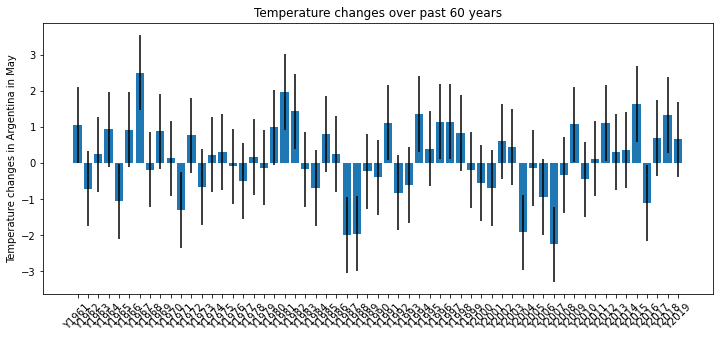

In [4]:

import seaborn as sns
import numpy as np
fig, ax = plt.subplots(figsize=(12,5))
#plot the temerature in argentina
x_pos=np.arange(len(df.columns[7:]))
ax = plt.bar(x_pos ,df.iloc[246,7:], yerr=df.iloc[246,7])
plt.xticks(x_pos, df.columns[7:], rotation=45)
plt.ylabel('Temperature changes in Argentina in May')
plt.title('Temperature changes over past 60 years')

In [5]:
x_pos


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58])

In [6]:
yerr=df.iloc[246,7]
yerr

1.045

In [7]:
df.iloc[246,7:]


Y1961    1.045
Y1962   -0.713
Y1963    0.235
Y1964    0.928
Y1965   -1.066
Y1966     0.92
Y1967    2.499
Y1968   -0.188
Y1969    0.871
Y1970    0.128
Y1971   -1.301
Y1972    0.766
Y1973   -0.665
Y1974    0.232
Y1975    0.302
Y1976   -0.094
Y1977   -0.503
Y1978    0.161
Y1979   -0.133
Y1980    0.984
Y1981    1.964
Y1982    1.432
Y1983   -0.176
Y1984     -0.7
Y1985    0.806
Y1986    0.251
Y1987   -1.999
Y1988   -1.957
Y1989   -0.235
Y1990   -0.398
Y1991    1.116
Y1992   -0.822
Y1993   -0.613
Y1994    1.352
Y1995    0.395
Y1996    1.141
Y1997    1.143
Y1998    0.831
Y1999   -0.199
Y2000   -0.555
Y2001   -0.694
Y2002    0.596
Y2003    0.439
Y2004   -1.922
Y2005   -0.146
Y2006   -0.943
Y2007   -2.256
Y2008   -0.336
Y2009    1.068
Y2010   -0.455
Y2011    0.118
Y2012    1.112
Y2013    0.297
Y2014    0.357
Y2015    1.629
Y2016   -1.107
Y2017    0.686
Y2018    1.334
Y2019    0.657
Name: 314, dtype: object

In [8]:
df.Area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of',
       'Cocos (Keeling) Islands', 'Colombia', 'Congo', "Côte d'Ivoire",
       'Cuba', 'Cyprus', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia',
       'French Southe

In [9]:
df.Months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
       'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object)

In [10]:
afg = df.iloc[:34,: ]
afgtemp = afg[afg['Element Code']==7271]
afgtemp=afgtemp.drop([32])
afgtemp=afgtemp.reset_index()
afgtemp=afgtemp.drop(columns=['index'])
afgtemp


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
5,2,Afghanistan,7006,June,7271,Temperature change,°C,-0.058,-1.061,1.164,...,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786,-0.289
6,2,Afghanistan,7007,July,7271,Temperature change,°C,0.884,0.292,0.348,...,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815,1.885
7,2,Afghanistan,7008,August,7271,Temperature change,°C,0.391,-0.220,0.094,...,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982,0.773
8,2,Afghanistan,7009,September,7271,Temperature change,°C,1.445,-1.797,0.163,...,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063,2.004
9,2,Afghanistan,7010,October,7271,Temperature change,°C,-1.102,-0.968,1.654,...,2.927,1.339,0.827,1.691,1.134,1.894,0.792,2.092,-0.103,1.264


In [11]:
tun = df[df.Area=='Bhutan']
tun=tun.reset_index()
tun=tun.drop(columns=['index'])
tun

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,18,Bhutan,7001,January,7271,Temperature change,°C,1.221,-1.049,-0.170,...,1.095,0.250,-0.869,-0.230,1.472,1.214,0.534,1.893,2.159,1.009
1,18,Bhutan,7001,January,6078,Standard Deviation,°C,0.615,0.615,0.615,...,0.615,0.615,0.615,0.615,0.615,0.615,0.615,0.615,0.615,0.615
2,18,Bhutan,7002,February,7271,Temperature change,°C,-0.665,-1.006,0.395,...,0.980,0.237,0.706,1.230,0.673,0.819,3.143,2.534,2.238,1.559
3,18,Bhutan,7002,February,6078,Standard Deviation,°C,0.868,0.868,0.868,...,0.868,0.868,0.868,0.868,0.868,0.868,0.868,0.868,0.868,0.868
4,18,Bhutan,7003,March,7271,Temperature change,°C,0.007,-0.256,-0.464,...,2.301,0.768,0.703,1.478,0.859,1.673,1.996,0.002,1.734,1.024
5,18,Bhutan,7003,March,6078,Standard Deviation,°C,0.706,0.706,0.706,...,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706
6,18,Bhutan,7004,April,7271,Temperature change,°C,0.364,0.524,-0.865,...,1.593,0.178,-0.241,0.446,1.481,-0.633,1.591,0.526,0.780,0.831
7,18,Bhutan,7004,April,6078,Standard Deviation,°C,0.718,0.718,0.718,...,0.718,0.718,0.718,0.718,0.718,0.718,0.718,0.718,0.718,0.718
8,18,Bhutan,7005,May,7271,Temperature change,°C,0.154,-0.077,-0.965,...,1.009,0.703,1.203,0.623,1.440,0.701,0.532,1.045,0.657,1.115
9,18,Bhutan,7005,May,6078,Standard Deviation,°C,0.634,0.634,0.634,...,0.634,0.634,0.634,0.634,0.634,0.634,0.634,0.634,0.634,0.634


Text(0.5, 1.0, 'Temperature changes over past 60 years')

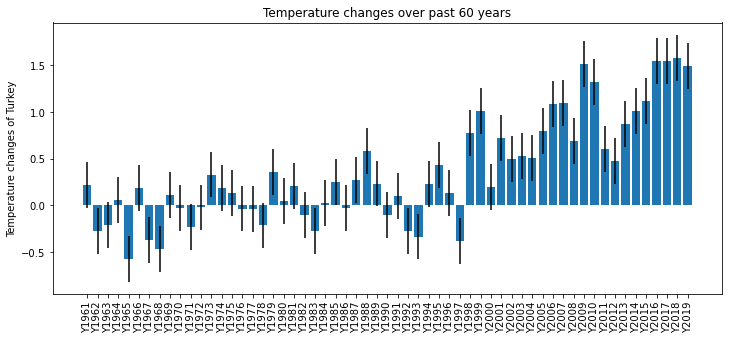

In [12]:
fig, ax = plt.subplots(figsize=(12,5))

x_pos=np.arange(len(tun.columns[7:]))
ax = plt.bar(x_pos ,tun.iloc[32,7:], yerr=tun.iloc[33,7])
plt.xticks(x_pos, tun.columns[7:], rotation=90)
plt.ylabel('Temperature changes of Turkey')
plt.title('Temperature changes over past 60 years')

In [13]:
tun.iloc[32,7:]


Y1961    0.218
Y1962   -0.278
Y1963   -0.213
Y1964    0.056
Y1965   -0.574
Y1966    0.186
Y1967   -0.371
Y1968   -0.463
Y1969    0.114
Y1970   -0.027
Y1971   -0.229
Y1972   -0.022
Y1973    0.331
Y1974    0.183
Y1975    0.132
Y1976   -0.033
Y1977   -0.042
Y1978   -0.215
Y1979    0.356
Y1980     0.05
Y1981    0.211
Y1982   -0.103
Y1983   -0.274
Y1984     0.03
Y1985    0.254
Y1986   -0.023
Y1987    0.268
Y1988    0.581
Y1989    0.235
Y1990     -0.1
Y1991    0.097
Y1992   -0.276
Y1993   -0.333
Y1994    0.233
Y1995    0.434
Y1996    0.133
Y1997   -0.384
Y1998    0.772
Y1999    1.015
Y2000    0.199
Y2001    0.725
Y2002    0.498
Y2003    0.529
Y2004    0.507
Y2005    0.802
Y2006    1.084
Y2007    1.096
Y2008    0.689
Y2009    1.519
Y2010    1.321
Y2011    0.604
Y2012    0.472
Y2013     0.87
Y2014    1.012
Y2015    1.119
Y2016    1.549
Y2017    1.551
Y2018    1.582
Y2019     1.49
Name: 32, dtype: object

In [14]:
tun.iloc[33,7]

0.246

In [15]:
tun.iloc[0:,7:]

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,1.221,-1.049,-0.170,0.018,0.293,-0.416,0.543,-0.803,-0.034,-0.462,...,1.095,0.250,-0.869,-0.230,1.472,1.214,0.534,1.893,2.159,1.009
1,0.615,0.615,0.615,0.615,0.615,0.615,0.615,0.615,0.615,0.615,...,0.615,0.615,0.615,0.615,0.615,0.615,0.615,0.615,0.615,0.615
2,-0.665,-1.006,0.395,-0.318,-1.565,1.223,0.087,-1.423,0.354,-0.682,...,0.980,0.237,0.706,1.230,0.673,0.819,3.143,2.534,2.238,1.559
3,0.868,0.868,0.868,0.868,0.868,0.868,0.868,0.868,0.868,0.868,...,0.868,0.868,0.868,0.868,0.868,0.868,0.868,0.868,0.868,0.868
4,0.007,-0.256,-0.464,0.426,-1.576,0.682,-1.371,-0.227,0.457,-0.202,...,2.301,0.768,0.703,1.478,0.859,1.673,1.996,0.002,1.734,1.024
5,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706,...,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706
6,0.364,0.524,-0.865,-0.299,-0.414,0.179,-1.432,-0.943,-0.119,-0.024,...,1.593,0.178,-0.241,0.446,1.481,-0.633,1.591,0.526,0.780,0.831
7,0.718,0.718,0.718,0.718,0.718,0.718,0.718,0.718,0.718,0.718,...,0.718,0.718,0.718,0.718,0.718,0.718,0.718,0.718,0.718,0.718
8,0.154,-0.077,-0.965,-0.754,0.102,1.014,-0.580,-0.302,0.537,0.745,...,1.009,0.703,1.203,0.623,1.440,0.701,0.532,1.045,0.657,1.115
9,0.634,0.634,0.634,0.634,0.634,0.634,0.634,0.634,0.634,0.634,...,0.634,0.634,0.634,0.634,0.634,0.634,0.634,0.634,0.634,0.634


In [16]:

tuntemp = tun[tun['Element Code']==7271]
tuntemp=tuntemp.drop([32])
tuntemp=tuntemp.reset_index()
tuntemp=tuntemp.drop(columns=['index'])
tuntemp_by_mon=tuntemp.iloc[0:12,0:]
tuntemp_by_mon


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,18,Bhutan,7001,January,7271,Temperature change,°C,1.221,-1.049,-0.170,...,1.095,0.250,-0.869,-0.230,1.472,1.214,0.534,1.893,2.159,1.009
1,18,Bhutan,7002,February,7271,Temperature change,°C,-0.665,-1.006,0.395,...,0.980,0.237,0.706,1.230,0.673,0.819,3.143,2.534,2.238,1.559
2,18,Bhutan,7003,March,7271,Temperature change,°C,0.007,-0.256,-0.464,...,2.301,0.768,0.703,1.478,0.859,1.673,1.996,0.002,1.734,1.024
3,18,Bhutan,7004,April,7271,Temperature change,°C,0.364,0.524,-0.865,...,1.593,0.178,-0.241,0.446,1.481,-0.633,1.591,0.526,0.780,0.831
4,18,Bhutan,7005,May,7271,Temperature change,°C,0.154,-0.077,-0.965,...,1.009,0.703,1.203,0.623,1.440,0.701,0.532,1.045,0.657,1.115
5,18,Bhutan,7006,June,7271,Temperature change,°C,0.206,-0.199,-0.104,...,1.193,1.000,1.038,1.964,1.684,1.364,1.248,1.157,1.863,2.648
6,18,Bhutan,7007,July,7271,Temperature change,°C,0.373,0.372,0.222,...,1.340,0.710,0.801,1.387,1.352,1.467,0.966,1.263,1.607,1.223
7,18,Bhutan,7008,August,7271,Temperature change,°C,0.586,-0.087,0.081,...,1.308,0.335,0.857,0.515,0.416,0.752,2.032,1.515,1.601,2.448
8,18,Bhutan,7009,September,7271,Temperature change,°C,0.283,0.539,0.480,...,0.951,1.156,0.474,1.177,0.527,1.642,1.188,2.028,1.925,0.896
9,18,Bhutan,7010,October,7271,Temperature change,°C,0.506,-0.019,-0.174,...,1.250,0.867,-0.212,0.646,0.523,1.245,2.151,2.097,0.534,1.326


In [17]:
tuntemp_by_mon.iloc[0:,lambda df: [3, 7]]

,Months,Y1961
0,January,1.221
1,February,-0.665
2,March,0.007
3,April,0.364
4,May,0.154
5,June,0.206
6,July,0.373
7,August,0.586
8,September,0.283
9,October,0.506


In [18]:
db=pd.melt(tuntemp_by_mon,id_vars=["Area Code","Area","Months Code","Months","Element Code","Element","Unit"])
db

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,variable,value
0,18,Bhutan,7001,January,7271,Temperature change,°C,Y1961,1.221
1,18,Bhutan,7002,February,7271,Temperature change,°C,Y1961,-0.665
2,18,Bhutan,7003,March,7271,Temperature change,°C,Y1961,0.007
3,18,Bhutan,7004,April,7271,Temperature change,°C,Y1961,0.364
4,18,Bhutan,7005,May,7271,Temperature change,°C,Y1961,0.154
...,...,...,...,...,...,...,...,...,...
703,18,Bhutan,7008,August,7271,Temperature change,°C,Y2019,2.448
704,18,Bhutan,7009,September,7271,Temperature change,°C,Y2019,0.896
705,18,Bhutan,7010,October,7271,Temperature change,°C,Y2019,1.326
706,18,Bhutan,7011,November,7271,Temperature change,°C,Y2019,2.891


In [19]:
db.index=db["Months"]+db["variable"]
db


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,variable,value
JanuaryY1961,18,Bhutan,7001,January,7271,Temperature change,°C,Y1961,1.221
FebruaryY1961,18,Bhutan,7002,February,7271,Temperature change,°C,Y1961,-0.665
MarchY1961,18,Bhutan,7003,March,7271,Temperature change,°C,Y1961,0.007
AprilY1961,18,Bhutan,7004,April,7271,Temperature change,°C,Y1961,0.364
MayY1961,18,Bhutan,7005,May,7271,Temperature change,°C,Y1961,0.154
...,...,...,...,...,...,...,...,...,...
AugustY2019,18,Bhutan,7008,August,7271,Temperature change,°C,Y2019,2.448
SeptemberY2019,18,Bhutan,7009,September,7271,Temperature change,°C,Y2019,0.896
OctoberY2019,18,Bhutan,7010,October,7271,Temperature change,°C,Y2019,1.326
NovemberY2019,18,Bhutan,7011,November,7271,Temperature change,°C,Y2019,2.891


In [20]:
db.index


Index(['JanuaryY1961', 'FebruaryY1961', 'MarchY1961', 'AprilY1961', 'MayY1961',
       'JuneY1961', 'JulyY1961', 'AugustY1961', 'SeptemberY1961',
       'OctoberY1961',
       ...
       'MarchY2019', 'AprilY2019', 'MayY2019', 'JuneY2019', 'JulyY2019',
       'AugustY2019', 'SeptemberY2019', 'OctoberY2019', 'NovemberY2019',
       'DecemberY2019'],
      dtype='object', length=708)

In [21]:
db.shape


(708, 9)

<AxesSubplot:>

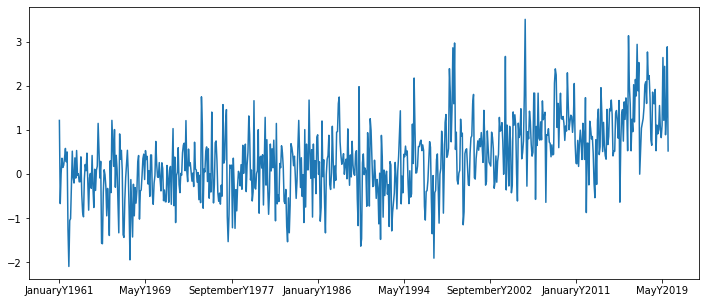

In [22]:
db["value"].plot(figsize=(12,5))

In [23]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF:", dftest[0])
    
    
    print("2. P-value:", dftest[1])
    print("3. Number of lags:", dftest[2])
    print("4. ADF Regression and Critical Values Calculation:", dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)


In [24]:
ad_test(db["value"])

1. ADF: -3.2227353208366756
2. P-value: 0.018705814990901435
3. Number of lags: 9
4. ADF Regression and Critical Values Calculation: 698
5. Critical Values:
	 1% : -3.439753311961436
	 5% : -2.8656896390914217
	 10% : -2.568979777013325


In [25]:
start_date = '1961-01-01'
end_date = '2019-12-01'


date_range = pd.date_range(start=start_date, end=end_date, freq='MS') 
db = db.set_index(date_range)

In [26]:
db

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,variable,value
1961-01-01,18,Bhutan,7001,January,7271,Temperature change,°C,Y1961,1.221
1961-02-01,18,Bhutan,7002,February,7271,Temperature change,°C,Y1961,-0.665
1961-03-01,18,Bhutan,7003,March,7271,Temperature change,°C,Y1961,0.007
1961-04-01,18,Bhutan,7004,April,7271,Temperature change,°C,Y1961,0.364
1961-05-01,18,Bhutan,7005,May,7271,Temperature change,°C,Y1961,0.154
...,...,...,...,...,...,...,...,...,...
2019-08-01,18,Bhutan,7008,August,7271,Temperature change,°C,Y2019,2.448
2019-09-01,18,Bhutan,7009,September,7271,Temperature change,°C,Y2019,0.896
2019-10-01,18,Bhutan,7010,October,7271,Temperature change,°C,Y2019,1.326
2019-11-01,18,Bhutan,7011,November,7271,Temperature change,°C,Y2019,2.891


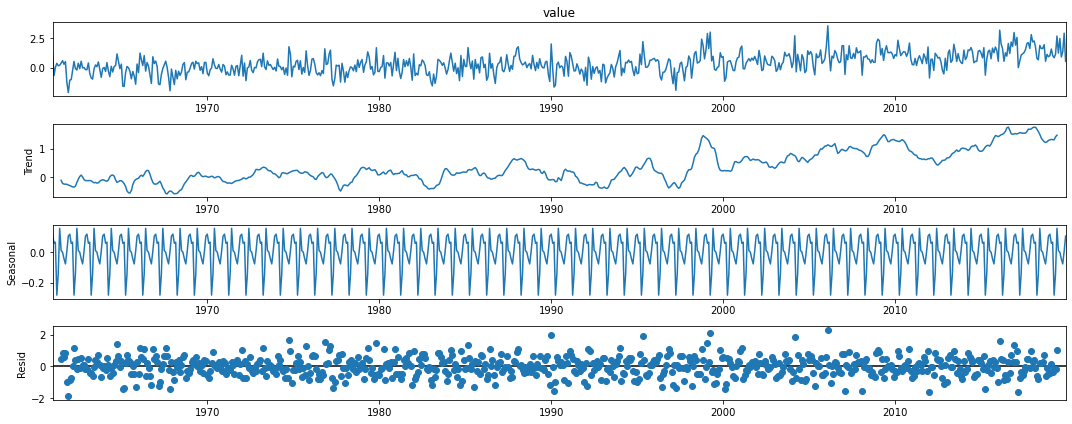

In [27]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6



result = seasonal_decompose(db["value"], model='additive') #need to choose the proper freq

result.plot()
pyplot.show()

C:\Users\AHMED\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


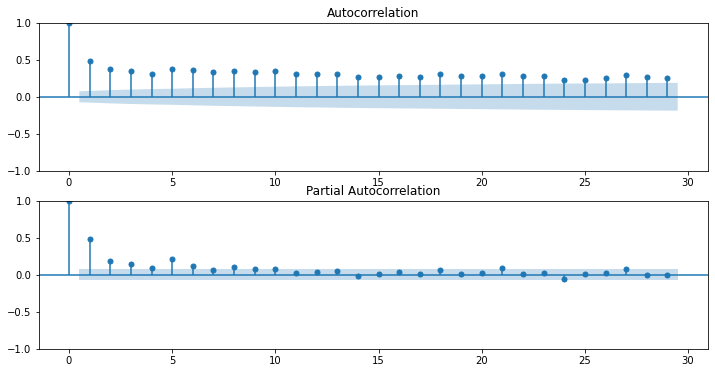

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0]=plot_acf(db["value"], ax=ax[0])
ax[1]=plot_pacf(db["value"],ax=ax[1])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

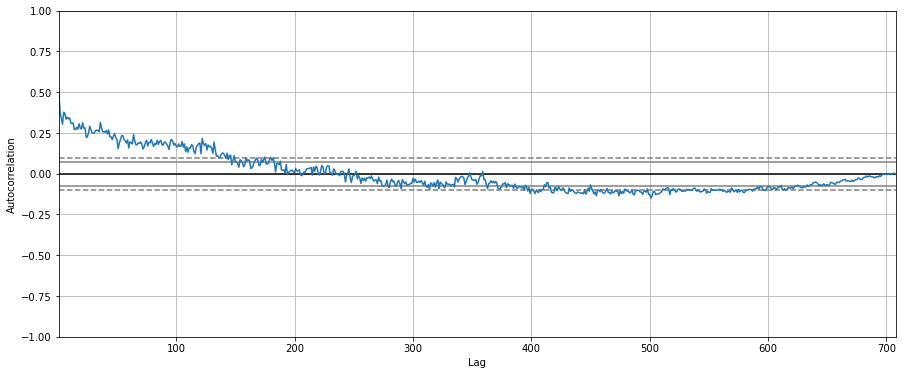

In [29]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(db["value"])

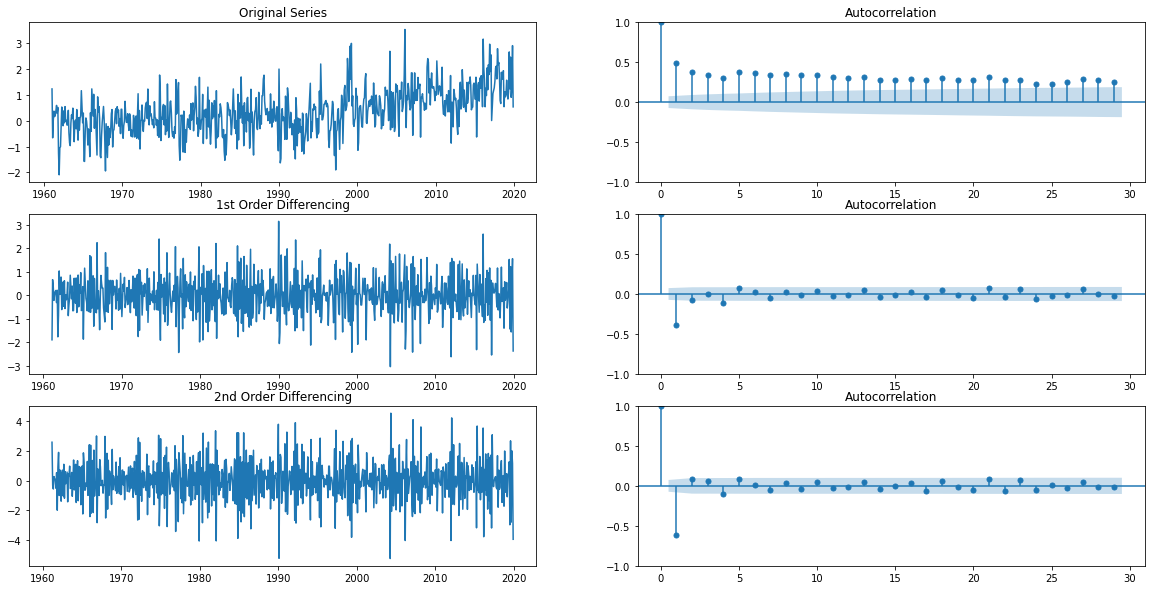

In [30]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(20,10))
axes[0, 0].plot(db["value"]); axes[0, 0].set_title('Original Series')
plot_acf(db["value"], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(db["value"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(db["value"].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(db["value"].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(db["value"].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [31]:
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(db["value"].diff().dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

    
print("\n > Is the de-trended data stationary after the second differencing ?")
dftest = adfuller(db["value"].diff().diff().dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the de-trended data stationary ?
Test statistic = -14.861
P-value = 0.000
Critical values :
	1%: -3.439753311961436 - The data is  stationary with 99% confidence
	5%: -2.8656896390914217 - The data is  stationary with 95% confidence
	10%: -2.568979777013325 - The data is  stationary with 90% confidence

 > Is the de-trended data stationary after the second differencing ?
Test statistic = -11.555
P-value = 0.000
Critical values :
	1%: -3.4399324443722814 - The data is  stationary with 99% confidence
	5%: -2.865768564020576 - The data is  stationary with 95% confidence
	10%: -2.5690218258831052 - The data is  stationary with 90% confidence


In [31]:
train_length =int(len(db) *0.93) 
train = db[ : train_length]
test  = db[train_length :] 
train.shape, test.shape


((658, 9), (50, 9))

In [32]:
print("Mean of train set: ", train.mean()) 
print("Mean of test set: ", test.mean()) 
print("Mean difference of train and test is: ", train.mean() - test.mean()) 
print("------------------------------------------------------------ ") 
print("Variance of train set: ", train.var()) 
print("Varainace of test set: ", test.var()) 
print("Variance difference of train and test is: ", train.var() - test.var()) 


Mean of train set:  Area Code         18.000000
Months Code     7006.484802
Element Code    7271.000000
value              0.269146
dtype: float64
Mean of test set:  Area Code         18.00000
Months Code     7006.70000
Element Code    7271.00000
value              1.52674
dtype: float64
Mean difference of train and test is:  Area Code       0.000000
Months Code    -0.215198
Element Code    0.000000
value          -1.257594
dtype: float64
------------------------------------------------------------ 
Variance of train set:  Area Code        0.000000
Months Code     11.893985
Element Code     0.000000
value            0.628022
dtype: float64
Varainace of test set:  Area Code        0.000000
Months Code     12.663265
Element Code     0.000000
value            0.528350
dtype: float64
Variance difference of train and test is:  Area Code       0.000000
Months Code    -0.769280
Element Code    0.000000
value           0.099672
dtype: float64


C:\Users\AHMED\AppData\Local\Temp\ipykernel_12160\3810454914.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Mean of train set: ", train.mean())
C:\Users\AHMED\AppData\Local\Temp\ipykernel_12160\3810454914.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Mean of test set: ", test.mean())
C:\Users\AHMED\AppData\Local\Temp\ipykernel_12160\3810454914.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Mean difference of train and test is: ", train.mean() - test

In [33]:
train

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,variable,value
1961-01-01,18,Bhutan,7001,January,7271,Temperature change,°C,Y1961,1.221
1961-02-01,18,Bhutan,7002,February,7271,Temperature change,°C,Y1961,-0.665
1961-03-01,18,Bhutan,7003,March,7271,Temperature change,°C,Y1961,0.007
1961-04-01,18,Bhutan,7004,April,7271,Temperature change,°C,Y1961,0.364
1961-05-01,18,Bhutan,7005,May,7271,Temperature change,°C,Y1961,0.154
...,...,...,...,...,...,...,...,...,...
2015-06-01,18,Bhutan,7006,June,7271,Temperature change,°C,Y2015,1.364
2015-07-01,18,Bhutan,7007,July,7271,Temperature change,°C,Y2015,1.467
2015-08-01,18,Bhutan,7008,August,7271,Temperature change,°C,Y2015,0.752
2015-09-01,18,Bhutan,7009,September,7271,Temperature change,°C,Y2015,1.642


In [34]:
y_train = train["value"]
y_test = test["value"]
p_values = range(0,8) 
q_values = range(0,8)
d_values = range(0,3)


In [35]:
# evaluate combinations of p, d and q values for an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

best_score, best_cfg = float("inf"), None

In [36]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore")

In [37]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

best_score, best_cfg = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                model = ARIMA(train["value"], order=order)
                model = model.fit()
                y_hat = model.predict(start=len(train), end=(len(db) - 1))
                rmse = np.sqrt(np.square(np.subtract(y_test, y_hat)).mean())
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
            except:
                continue

print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


ARIMA(0, 0, 0) RMSE=1.449
ARIMA(0, 0, 1) RMSE=1.445
ARIMA(0, 0, 2) RMSE=1.439
ARIMA(0, 0, 3) RMSE=1.437
ARIMA(0, 0, 4) RMSE=1.437
ARIMA(0, 0, 5) RMSE=1.427
ARIMA(0, 0, 6) RMSE=1.417
ARIMA(0, 0, 7) RMSE=1.414
ARIMA(0, 1, 0) RMSE=0.773
ARIMA(0, 2, 1) RMSE=0.772
ARIMA(1, 1, 0) RMSE=0.740
ARIMA(1, 2, 1) RMSE=0.735
Best ARIMA(1, 2, 1) RMSE=0.735


In [41]:
stepwise_fit =auto_arima(db["value"],trace=True,suppress_warnings =True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2472.704, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2775.707, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2662.054, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2513.682, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2773.709, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2469.951, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2474.252, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2468.753, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2470.007, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2614.369, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2468.804, Time=0.11 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.767 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  708
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1230.376
Date:                Thu, 06 Jul 2023   AIC                           2468.753
Time:                        15:57:28   BIC                           2486.997
Sample:                    01-01-1961   HQIC                          2475.802
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      1.603      0.109      -0.000       0.004
ar.L1          0.2628      0.032      8.104      0.000       0.199       0.326
ma.L1         -0.9830      0.008   -121.309      0.000      -0.999      -0.967
sigma2         1.8939      0.087     21.841      0.000       1.724       2.064
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                31.18
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.29
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  708
Model:                 ARIMA(2, 1, 6)   Log Likelihood               -1225.943
Date:                Thu, 06 Jul 2023   AIC                           2469.886
Time:                        15:57:29   BIC                           2510.936
Sample:                    01-01-1961   HQIC                          2485.747
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8613      0.675     -1.276      0.202      -2.184       0.462
ar.L2          0.1004      0.657      0.153      0.879      -1.188       1.388
ma.L1          0.1513      0.675      0.224      0.8

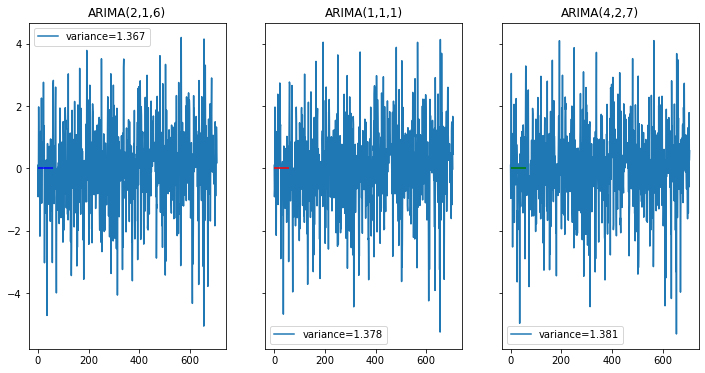

In [42]:
from statsmodels.tsa.arima.model import ARIMA
world = pd.DataFrame(db["value"])
world.values
model1 = ARIMA(db["value"], order=(2,1,6))
model_fit1 = model1.fit()
print(model_fit1.summary())

model2 = ARIMA(db["value"], order=(1,1,1))
model_fit2 = model2.fit()
print(model_fit2.summary())

model3 = ARIMA(db["value"], order=(4,2,7))
model_fit3 = model3.fit()
print(model_fit3.summary())

fig, ax = plt.subplots(1,3,sharey=True, figsize=(12, 6))
ax[0].plot(model_fit1.resid.values, alpha=1, label='variance={:.3f}'.format(np.std(model_fit1.resid.values)));
ax[0].hlines(0, xmin=0, xmax=59, color='b');
ax[0].set_title("ARIMA(2,1,6)");
ax[0].legend();
ax[1].plot(model_fit2.resid.values, alpha=1, label='variance={:.3f}'.format(np.std(model_fit2.resid.values)));
ax[1].hlines(0, xmin=0, xmax=59, color='r');
ax[1].set_title("ARIMA(1,1,1)");
ax[1].legend();
ax[2].plot(model_fit3.resid.values, alpha=1, label='variance={:.3f}'.format(np.std(model_fit3.resid.values)));
ax[2].hlines(0, xmin=0, xmax=59, color='g');
ax[2].set_title("ARIMA(4,2,7)");
ax[2].legend();

In [43]:
from statsmodels.tsa.arima.model import ARIMA


In [44]:


# Assuming your training data is stored in a DataFrame called 'train' with a column named 'value'
model = ARIMA(train["value"], order=(4, 2, 7))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  658
Model:                 ARIMA(4, 2, 7)   Log Likelihood               -1145.224
Date:                Thu, 06 Jul 2023   AIC                           2314.447
Time:                        15:57:33   BIC                           2368.281
Sample:                    01-01-1961   HQIC                          2335.319
                         - 10-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.8897      0.026   -111.761      0.000      -2.940      -2.839
ar.L2         -3.8445      0.062    -61.802      0.000      -3.966      -3.723
ar.L3         -2.7932      0.062    -45.276      0.0

In [32]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred2=model.predict(start=0,end=end,typ='levels').rename('ARIMA Predictions')

pred.plot(legend=True)
test["value"].plot(legend=True)
#pred.index=df.index[start:end+1)

print(pred)
print(test["value"])
model.aic




NameError: name 'train' is not defined

<AxesSubplot:>

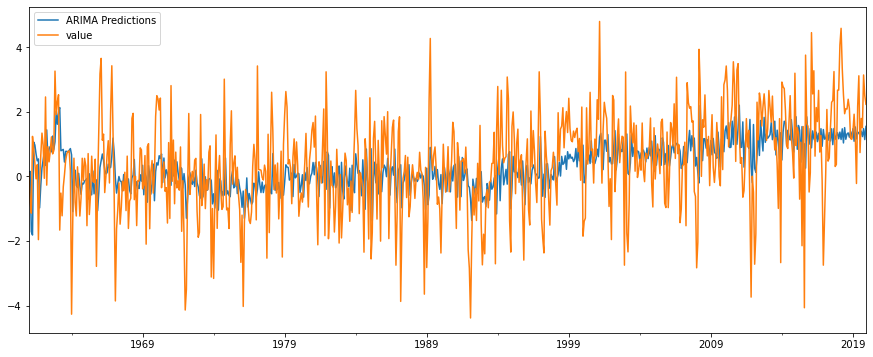

In [46]:
end=len(train)+len(test)-1

pred2=model.predict(start=0,end=end,typ='levels').rename('ARIMA Predictions')

pred2.plot(legend=True)


db["value"].plot(legend=True)

In [47]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test["value"]))
print(rmse)

1.4484899200562456


In [48]:
test["value"].mean()

1.67612

In [49]:
index_date_range = pd.date_range(start='2020-01-01', end='2030-01-01', freq='MS') 

print(len(index_date_range))

121


In [50]:
predfin=model.predict(start=0,end=len(db)+121,typ='levels').rename('ARIMA Predictions')
predfin

1961-01-01    0.000000
1961-02-01    0.153000
1961-03-01   -1.713991
1961-04-01   -1.816974
1961-05-01    1.059168
                ...   
2029-10-01    1.666992
2029-11-01    1.759632
2029-12-01    1.641419
2030-01-01    1.779548
2030-02-01    1.651399
Freq: MS, Name: ARIMA Predictions, Length: 830, dtype: float64

<AxesSubplot:>

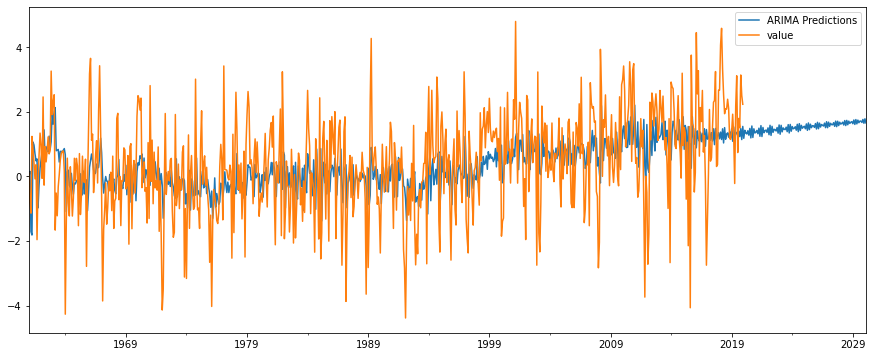

In [51]:
predfin.plot(legend=True)
db["value"].plot(legend=True)

SARIMA MODEL :


<AxesSubplot:>

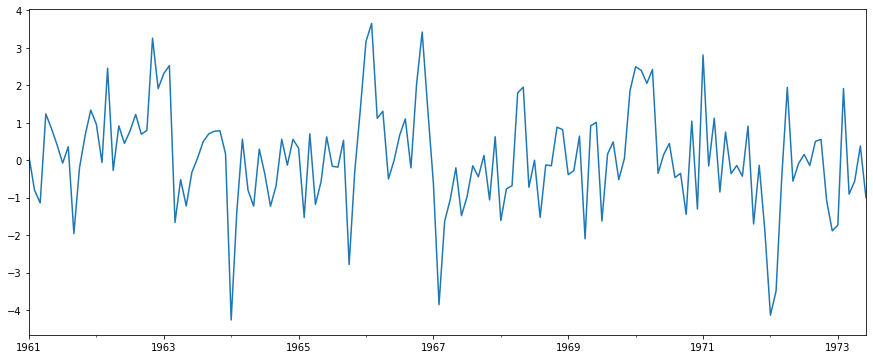

In [52]:
db["value"][:150].plot()


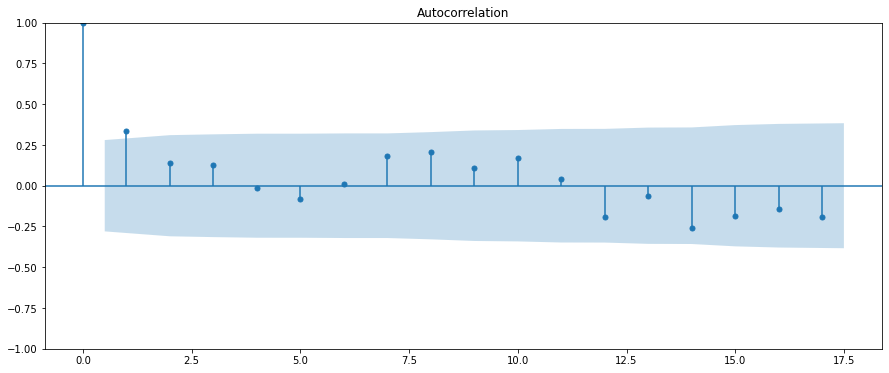

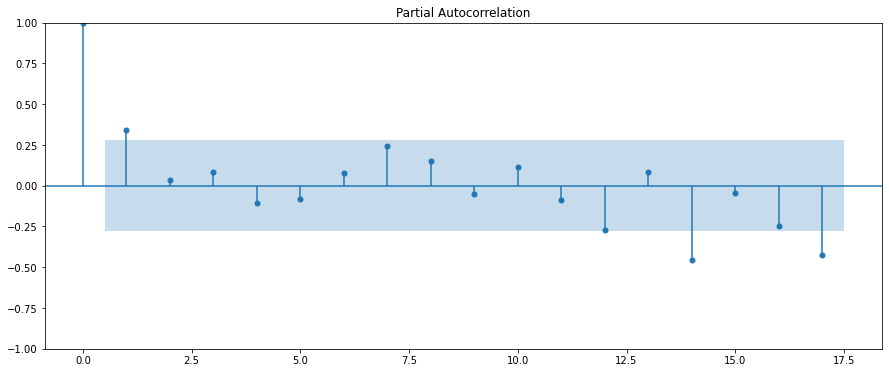

In [53]:
acf_plot = plot_acf(db.loc["1961-01-01":"1965-01-01"]["value"])
pacf_plot = plot_pacf(db.loc["1961-01-01":"1965-01-01"]["value"])



In [54]:
model = auto_arima(db["value"], seasonal=True, m=12)

# Get the order parameters of the best model
order = model.order
seasonal_order = model.seasonal_order

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np

# Define the range of parameter values to search
p_values = range(0, 6)  # p values for AR component
d_values = range(0, 2)  # d values for differencing
q_values = range(0, 6)  # q values for MA component
s_values = range(0, 15)  # s values for seasonal differencing

P_values = range(0, 6)  # P values for seasonal AR component
D_values = range(0, 2)  # D values for seasonal differencing
Q_values = range(0, 6)  # Q values for seasonal MA component

# Create a list of all possible combinations of parameter values
seasonal_orders = list(itertools.product(p_values, d_values, q_values, s_values))
orders = list(itertools.product(P_values, D_values, Q_values))

best_aic = np.inf  # initialize the best AIC with a high value
best_seasonal_order = None
best_order = None

# Iterate over all combinations and fit the SARIMAX model
for seasonal_order in seasonal_orders:
    for order in orders:
        try:
            model = SARIMAX(train["value"], order=order, seasonal_order=seasonal_order)
            model_fit = model.fit()
            aic = model_fit.aic
            print('best ARIMA%s AIC=%.3f' % (order, aic))
            if aic < best_aic:
                
                best_aic = aic
                best_seasonal_order = seasonal_order
                best_order = order
                print('ARIMA%s sarima=%s  aic=%.3f' % (order, seasonal_order,aic))


        except:
            continue

# Print the best seasonal order and order
print("Best Seasonal Order:", best_seasonal_order)
print("Best Order:", best_order)


best ARIMA(0, 0, 0) AIC=2408.101
ARIMA(0, 0, 0) sarima=(0, 0, 0, 0)  aic=2408.101
best ARIMA(0, 0, 1) AIC=2347.622
ARIMA(0, 0, 1) sarima=(0, 0, 0, 0)  aic=2347.622
best ARIMA(0, 0, 2) AIC=2336.746
ARIMA(0, 0, 2) sarima=(0, 0, 0, 0)  aic=2336.746
best ARIMA(0, 0, 3) AIC=2334.709
ARIMA(0, 0, 3) sarima=(0, 0, 0, 0)  aic=2334.709
best ARIMA(0, 0, 4) AIC=2331.338
ARIMA(0, 0, 4) sarima=(0, 0, 0, 0)  aic=2331.338
best ARIMA(0, 0, 5) AIC=2331.232
ARIMA(0, 0, 5) sarima=(0, 0, 0, 0)  aic=2331.232
best ARIMA(0, 1, 0) AIC=2592.774
best ARIMA(0, 1, 1) AIC=2335.006
best ARIMA(0, 1, 2) AIC=2303.379
ARIMA(0, 1, 2) sarima=(0, 0, 0, 0)  aic=2303.379
best ARIMA(0, 1, 3) AIC=2301.627
ARIMA(0, 1, 3) sarima=(0, 0, 0, 0)  aic=2301.627
best ARIMA(0, 1, 4) AIC=2303.371
best ARIMA(0, 1, 5) AIC=2304.261
best ARIMA(1, 0, 0) AIC=2332.175
best ARIMA(1, 0, 1) AIC=2322.921
best ARIMA(1, 0, 2) AIC=2306.779
best ARIMA(1, 0, 3) AIC=2305.143
best ARIMA(1, 0, 4) AIC=2306.900
best ARIMA(1, 0, 5) AIC=2307.812
best ARIMA(1, 

best ARIMA(1, 0, 1) AIC=2322.921
best ARIMA(1, 0, 2) AIC=2306.779
best ARIMA(1, 0, 3) AIC=2305.143
best ARIMA(1, 0, 4) AIC=2306.900
best ARIMA(1, 0, 5) AIC=2307.812
best ARIMA(1, 1, 0) AIC=2482.154
best ARIMA(1, 1, 1) AIC=2299.585
best ARIMA(1, 1, 2) AIC=2300.958
best ARIMA(1, 1, 3) AIC=2302.835
best ARIMA(1, 1, 4) AIC=2298.794
best ARIMA(1, 1, 5) AIC=2306.258
best ARIMA(2, 0, 0) AIC=2328.358
best ARIMA(2, 0, 1) AIC=2303.100
best ARIMA(2, 0, 2) AIC=2304.502
best ARIMA(2, 0, 3) AIC=2306.381
best ARIMA(2, 0, 4) AIC=2302.313
best ARIMA(2, 0, 5) AIC=2309.809
best ARIMA(2, 1, 0) AIC=2434.701
best ARIMA(2, 1, 1) AIC=2301.018
best ARIMA(2, 1, 2) AIC=2302.763
best ARIMA(2, 1, 3) AIC=2298.468
best ARIMA(2, 1, 4) AIC=2300.469
best ARIMA(2, 1, 5) AIC=2306.195
best ARIMA(3, 0, 0) AIC=2327.096
best ARIMA(3, 0, 1) AIC=2304.558
best ARIMA(3, 0, 2) AIC=2301.243
best ARIMA(3, 0, 3) AIC=2302.094
best ARIMA(3, 0, 4) AIC=2308.309
best ARIMA(3, 0, 5) AIC=2309.857
best ARIMA(3, 1, 0) AIC=2403.040
best ARIMA

best ARIMA(3, 1, 4) AIC=2299.467
best ARIMA(3, 1, 5) AIC=2302.947
best ARIMA(4, 0, 0) AIC=2324.969
best ARIMA(4, 0, 1) AIC=2306.490
best ARIMA(4, 0, 2) AIC=2301.988
best ARIMA(4, 0, 3) AIC=2302.033
best ARIMA(4, 0, 4) AIC=2308.004
best ARIMA(4, 0, 5) AIC=2307.668
best ARIMA(4, 1, 0) AIC=2390.576
best ARIMA(4, 1, 1) AIC=2304.487
best ARIMA(4, 1, 2) AIC=2300.439
best ARIMA(4, 1, 3) AIC=2299.443
best ARIMA(4, 1, 4) AIC=2303.158
best ARIMA(4, 1, 5) AIC=2303.977
best ARIMA(5, 0, 0) AIC=2326.199
best ARIMA(5, 0, 1) AIC=2308.035
best ARIMA(5, 0, 2) AIC=2303.994
best ARIMA(5, 0, 3) AIC=2306.571
best ARIMA(5, 0, 4) AIC=2303.153
best ARIMA(5, 0, 5) AIC=2307.635
best ARIMA(5, 1, 0) AIC=2379.109
best ARIMA(5, 1, 1) AIC=2306.308
best ARIMA(5, 1, 2) AIC=2301.319
best ARIMA(5, 1, 3) AIC=2302.827
best ARIMA(5, 1, 4) AIC=2303.368
best ARIMA(5, 1, 5) AIC=2302.205
best ARIMA(0, 0, 0) AIC=2408.101
best ARIMA(0, 0, 1) AIC=2347.622
best ARIMA(0, 0, 2) AIC=2336.746
best ARIMA(0, 0, 3) AIC=2334.709
best ARIMA

best ARIMA(0, 1, 1) AIC=2335.006
best ARIMA(0, 1, 2) AIC=2303.379
best ARIMA(0, 1, 3) AIC=2301.627
best ARIMA(0, 1, 4) AIC=2303.371
best ARIMA(0, 1, 5) AIC=2304.261
best ARIMA(1, 0, 0) AIC=2332.175
best ARIMA(1, 0, 1) AIC=2322.921
best ARIMA(1, 0, 2) AIC=2306.779
best ARIMA(1, 0, 3) AIC=2305.143
best ARIMA(1, 0, 4) AIC=2306.900
best ARIMA(1, 0, 5) AIC=2307.812
best ARIMA(1, 1, 0) AIC=2482.154
best ARIMA(1, 1, 1) AIC=2299.585
best ARIMA(1, 1, 2) AIC=2300.958
best ARIMA(1, 1, 3) AIC=2302.835
best ARIMA(1, 1, 4) AIC=2298.794
best ARIMA(1, 1, 5) AIC=2306.258
best ARIMA(2, 0, 0) AIC=2328.358
best ARIMA(2, 0, 1) AIC=2303.100
best ARIMA(2, 0, 2) AIC=2304.502
best ARIMA(2, 0, 3) AIC=2306.381
best ARIMA(2, 0, 4) AIC=2302.313
best ARIMA(2, 0, 5) AIC=2309.809
best ARIMA(2, 1, 0) AIC=2434.701
best ARIMA(2, 1, 1) AIC=2301.018
best ARIMA(2, 1, 2) AIC=2302.763
best ARIMA(2, 1, 3) AIC=2298.468
best ARIMA(2, 1, 4) AIC=2300.469
best ARIMA(2, 1, 5) AIC=2306.195
best ARIMA(3, 0, 0) AIC=2327.096
best ARIMA

best ARIMA(3, 0, 4) AIC=2308.309
best ARIMA(3, 0, 5) AIC=2309.857
best ARIMA(3, 1, 0) AIC=2403.040
best ARIMA(3, 1, 1) AIC=2302.947
best ARIMA(3, 1, 2) AIC=2298.450
best ARIMA(3, 1, 3) AIC=2298.257
best ARIMA(3, 1, 4) AIC=2299.467
best ARIMA(3, 1, 5) AIC=2302.947
best ARIMA(4, 0, 0) AIC=2324.969
best ARIMA(4, 0, 1) AIC=2306.490
best ARIMA(4, 0, 2) AIC=2301.988
best ARIMA(4, 0, 3) AIC=2302.033
best ARIMA(4, 0, 4) AIC=2308.004
best ARIMA(4, 0, 5) AIC=2307.668
best ARIMA(4, 1, 0) AIC=2390.576
best ARIMA(4, 1, 1) AIC=2304.487
best ARIMA(4, 1, 2) AIC=2300.439
best ARIMA(4, 1, 3) AIC=2299.443
best ARIMA(4, 1, 4) AIC=2303.158
best ARIMA(4, 1, 5) AIC=2303.977
best ARIMA(5, 0, 0) AIC=2326.199
best ARIMA(5, 0, 1) AIC=2308.035
best ARIMA(5, 0, 2) AIC=2303.994
best ARIMA(5, 0, 3) AIC=2306.571
best ARIMA(5, 0, 4) AIC=2303.153
best ARIMA(5, 0, 5) AIC=2307.635
best ARIMA(5, 1, 0) AIC=2379.109
best ARIMA(5, 1, 1) AIC=2306.308
best ARIMA(5, 1, 2) AIC=2301.319
best ARIMA(5, 1, 3) AIC=2302.827
best ARIMA

best ARIMA(3, 1, 4) AIC=2304.603
best ARIMA(3, 1, 5) AIC=2304.600
best ARIMA(4, 0, 0) AIC=2326.847
best ARIMA(4, 0, 1) AIC=2308.381
best ARIMA(4, 0, 2) AIC=2303.998
best ARIMA(4, 0, 3) AIC=2308.935
best ARIMA(4, 0, 4) AIC=2311.248
best ARIMA(4, 0, 5) AIC=2312.090
best ARIMA(4, 1, 0) AIC=2388.712
best ARIMA(4, 1, 1) AIC=2306.337
best ARIMA(4, 1, 2) AIC=2302.439
best ARIMA(4, 1, 3) AIC=2301.744
best ARIMA(4, 1, 4) AIC=2305.085
best ARIMA(4, 1, 5) AIC=2306.876
best ARIMA(5, 0, 0) AIC=2328.198
best ARIMA(5, 0, 1) AIC=2309.886
best ARIMA(5, 0, 2) AIC=2305.992
best ARIMA(5, 0, 3) AIC=2311.396
best ARIMA(5, 0, 4) AIC=2304.861
best ARIMA(5, 0, 5) AIC=2317.440
best ARIMA(5, 1, 0) AIC=2320.891
best ARIMA(5, 1, 1) AIC=2308.445
best ARIMA(5, 1, 2) AIC=2303.312
best ARIMA(5, 1, 3) AIC=2304.601
best ARIMA(5, 1, 4) AIC=2304.948
best ARIMA(5, 1, 5) AIC=2302.839
best ARIMA(0, 0, 0) AIC=2394.152
best ARIMA(0, 0, 1) AIC=2337.855
best ARIMA(0, 0, 2) AIC=2328.831
best ARIMA(0, 0, 3) AIC=2327.991
best ARIMA

best ARIMA(0, 1, 1) AIC=2336.661
best ARIMA(0, 1, 2) AIC=2305.137
best ARIMA(0, 1, 3) AIC=2303.171
best ARIMA(0, 1, 4) AIC=2304.940
best ARIMA(0, 1, 5) AIC=2305.624
best ARIMA(1, 0, 0) AIC=2330.510
best ARIMA(1, 0, 1) AIC=2322.165
best ARIMA(1, 0, 2) AIC=2308.543
best ARIMA(1, 0, 3) AIC=2306.686
best ARIMA(1, 0, 4) AIC=2308.465
best ARIMA(1, 0, 5) AIC=2309.166
best ARIMA(1, 1, 0) AIC=2483.281
best ARIMA(1, 1, 1) AIC=2301.212
best ARIMA(1, 1, 2) AIC=2302.466
best ARIMA(1, 1, 3) AIC=2304.327
best ARIMA(1, 1, 4) AIC=2299.829
best ARIMA(1, 1, 5) AIC=2307.620
best ARIMA(2, 0, 0) AIC=2326.852
best ARIMA(2, 0, 1) AIC=2304.724
best ARIMA(2, 0, 2) AIC=2306.004
best ARIMA(2, 0, 3) AIC=2307.866
best ARIMA(2, 0, 4) AIC=2303.342
best ARIMA(2, 0, 5) AIC=2311.163
best ARIMA(2, 1, 0) AIC=2436.318
best ARIMA(2, 1, 1) AIC=2302.538
best ARIMA(2, 1, 2) AIC=2304.596
best ARIMA(2, 1, 3) AIC=2299.504
best ARIMA(2, 1, 4) AIC=2301.562
best ARIMA(2, 1, 5) AIC=2308.081
best ARIMA(3, 0, 0) AIC=2326.320
best ARIMA

float64
0
(1, 1, 1)
(1, 0, 0, 12)
2015-11-01    1.263210
2015-12-01    0.993937
2016-01-01    1.480415
2016-02-01    0.880952
2016-03-01    1.405441
2016-04-01    1.169336
2016-05-01    1.086899
2016-06-01    1.368079
2016-07-01    1.073428
2016-08-01    1.332114
2016-09-01    1.045185
2016-10-01    1.473480
2016-11-01    0.929509
2016-12-01    1.448130
2017-01-01    1.150310
2017-02-01    1.168578
2017-03-01    1.360132
2017-04-01    1.115225
2017-05-01    1.351582
2017-06-01    1.093411
2017-07-01    1.469936
2017-08-01    0.980510
2017-09-01    1.481251
2017-10-01    1.142913
2017-11-01    1.243416
2017-12-01    1.351666
2018-01-01    1.161347
2018-02-01    1.368695
2018-03-01    1.139707
2018-04-01    1.469431
2018-05-01    1.032652
2018-06-01    1.506999
2018-07-01    1.145763
2018-08-01    1.310939
2018-09-01    1.344465
2018-10-01    1.210264
2018-11-01    1.383651
2018-12-01    1.184849
2019-01-01    1.471554
2019-02-01    1.085031
2019-03-01    1.527220
2019-04-01    1.157425


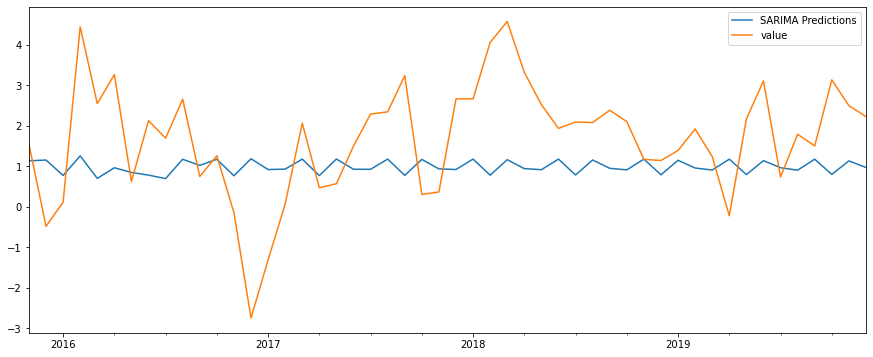

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train["value"] = train["value"].astype(float)
print(train['value'].dtype)
print(train['value'].isnull().sum())
print(order)
print(seasonal_order)
model2 = SARIMAX(train["value"], order=(2, 1, 4), seasonal_order=(0,0,1,11))
model_fit = model2.fit()
model_fit.summary()
start=len(train)
end=len(train)+len(test)-1
predsar=model_fit.predict(start=start,end=end,typ='levels').rename('SARIMA Predictions')
predsarall=model_fit.predict(start=0,end=end,typ='levels').rename('SARIMA Predictions')



predsar.index=db.index[start:end+1]
print(pred)
predsar.plot(legend=True)
test['value'].plot(legend=True)
test['value'].mean()
rmse=sqrt(mean_squared_error(predsar,test['value']))
print(rmse)
print(db.info)


<AxesSubplot:>

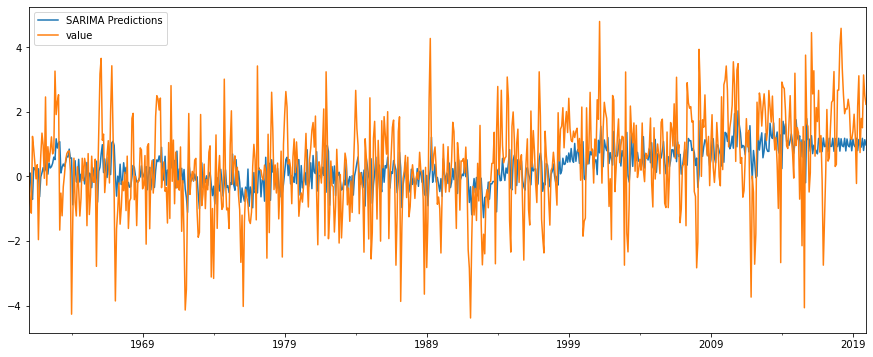

In [63]:


predsarall.plot(legend=True)


db["value"].plot(legend=True)

In [57]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse=sqrt(mean_squared_error(predsar,test["value"]))
print(rmse)

1.5671167375973387


In [58]:
index_date_range = pd.date_range(start='2020-01-01', end='2030-01-01', freq='MS') 

print(len(index_date_range))

121


In [59]:


predictions=model_fit.predict(start=0,end=len(db)+121).rename('SARIMA Predictions')
predictions 

1961-01-01    0.000000
1961-02-01    0.102000
1961-03-01   -0.465515
1961-04-01   -0.714012
1961-05-01    0.267448
                ...   
2029-10-01    0.922481
2029-11-01    0.998496
2029-12-01    1.064270
2030-01-01    0.883395
2030-02-01    1.108292
Freq: MS, Name: SARIMA Predictions, Length: 830, dtype: float64

<AxesSubplot:>

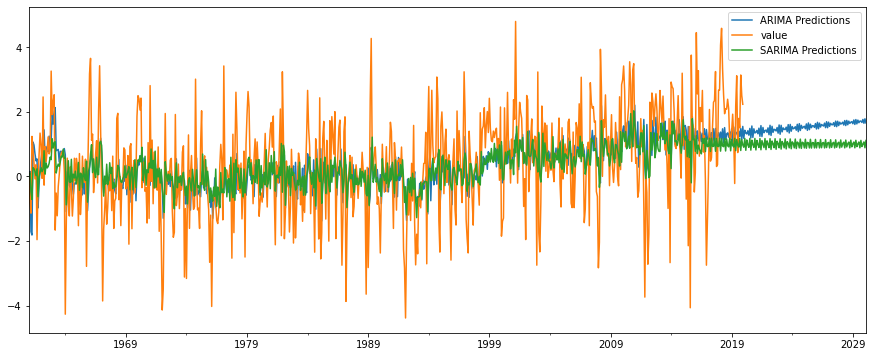

In [60]:
predfin.plot(legend=True)
db["value"].plot(legend=True)
predictions.plot(legend=True)

LTSM

In [33]:
import tensorflow as tf

<AxesSubplot:>

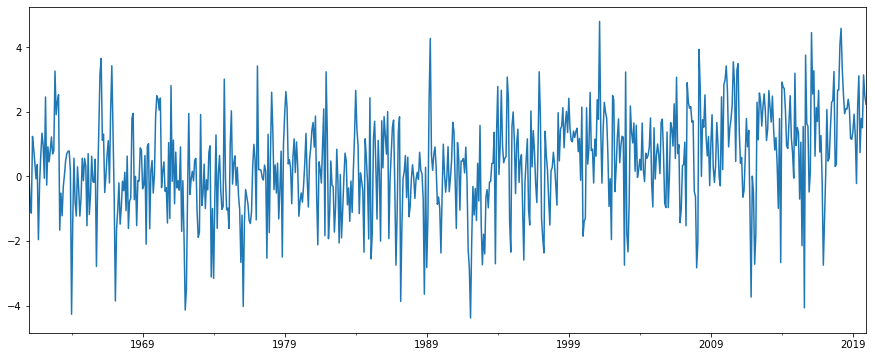

In [42]:
temp=db["value"]
temp.plot()

In [38]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [41]:
WINDOW_SIZE = 10
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'to_numpy'

In [82]:
train_length =int(len(db) *0.90) 
val_length=int(len(db)*0.95)

X_train1, y_train1 = X1[:  train_length], y1[: train_length]
X_val1, y_val1 = X1[train_length:val_length], y1[train_length:val_length]
X_test1, y_test1 = X1[val_length:], y1[val_length:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((637, 10, 1), (637,), (35, 10, 1), (35,), (26, 10, 1), (26,))

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((10, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [88]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
15/20 [=====================>........] - ETA: 0s - loss: 1.9907 - root_mean_squared_error: 1.4109 INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 4s 133ms/step - loss: 2.0862 - root_mean_squared_error: 1.4444 - val_loss: 3.7789 - val_root_mean_squared_error: 1.9439
Epoch 2/10
15/20 [=====================>........] - ETA: 0s - loss: 2.1352 - root_mean_squared_error: 1.4612INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 3s 135ms/step - loss: 2.0565 - root_mean_squared_error: 1.4340 - val_loss: 3.6976 - val_root_mean_squared_error: 1.9229
Epoch 3/10
16/20 [=======================>......] - ETA: 0s - loss: 2.1168 - root_mean_squared_error: 1.4549INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 2s 119ms/step - loss: 2.0283 - root_mean_squared_error: 1.4242 - val_loss: 3.6412 - val_root_mean_squared_error: 1.9082
Epoch 4/10
14/20 [====================>.........] - ETA: 0s - loss: 1.8978 - root_mean_squared_error: 1.3776INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 2s 124ms/step - loss: 2.0087 - root_mean_squared_error: 1.4173 - val_loss: 3.6010 - val_root_mean_squared_error: 1.8976
Epoch 5/10
14/20 [====================>.........] - ETA: 0s - loss: 2.0470 - root_mean_squared_error: 1.4307INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 3s 138ms/step - loss: 1.9924 - root_mean_squared_error: 1.4115 - val_loss: 3.5770 - val_root_mean_squared_error: 1.8913
Epoch 6/10
13/20 [==================>...........] - ETA: 0s - loss: 1.9479 - root_mean_squared_error: 1.3957INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 3s 132ms/step - loss: 1.9835 - root_mean_squared_error: 1.4084 - val_loss: 3.5641 - val_root_mean_squared_error: 1.8879
Epoch 7/10
15/20 [=====================>........] - ETA: 0s - loss: 1.9425 - root_mean_squared_error: 1.3938INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 2s 124ms/step - loss: 1.9773 - root_mean_squared_error: 1.4062 - val_loss: 3.5469 - val_root_mean_squared_error: 1.8833
Epoch 8/10
15/20 [=====================>........] - ETA: 0s - loss: 2.0679 - root_mean_squared_error: 1.4380INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 2s 122ms/step - loss: 1.9721 - root_mean_squared_error: 1.4043 - val_loss: 3.5401 - val_root_mean_squared_error: 1.8815
Epoch 9/10
14/20 [====================>.........] - ETA: 0s - loss: 1.9624 - root_mean_squared_error: 1.4008INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 3s 138ms/step - loss: 1.9693 - root_mean_squared_error: 1.4033 - val_loss: 3.5342 - val_root_mean_squared_error: 1.8800
Epoch 10/10
15/20 [=====================>........] - ETA: 0s - loss: 1.7556 - root_mean_squared_error: 1.3250INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


20/20 [==============================] - 2s 126ms/step - loss: 1.9650 - root_mean_squared_error: 1.4018 - val_loss: 3.5246 - val_root_mean_squared_error: 1.8774


In [89]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [90]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

20/20 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,-0.034246,0.657
1,0.003790,1.337
2,0.200530,0.960
3,0.306392,-0.062
4,0.233197,2.456
...,...,...
632,0.815610,1.690
633,0.877811,2.496
634,1.034783,1.179
635,0.973318,0.732


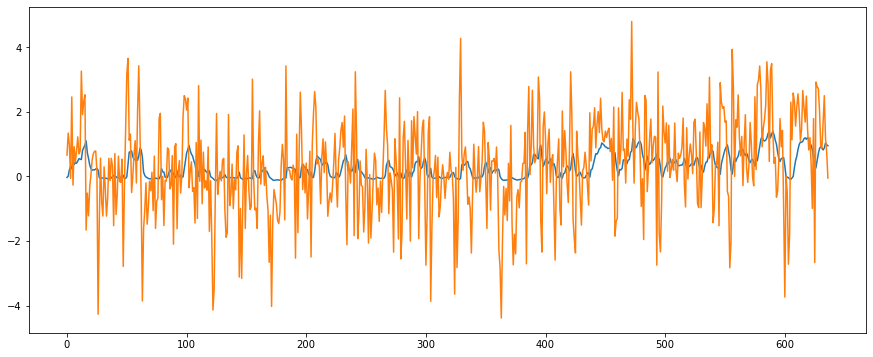

In [94]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [95]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

2/2 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,0.744186,3.191
1,0.943884,0.952
2,0.851120,1.508
3,0.856373,1.348
4,0.859674,-0.707
5,0.629731,1.056
6,0.627139,-2.148
7,0.278512,1.540
8,0.375988,-4.068
9,0.024421,3.751


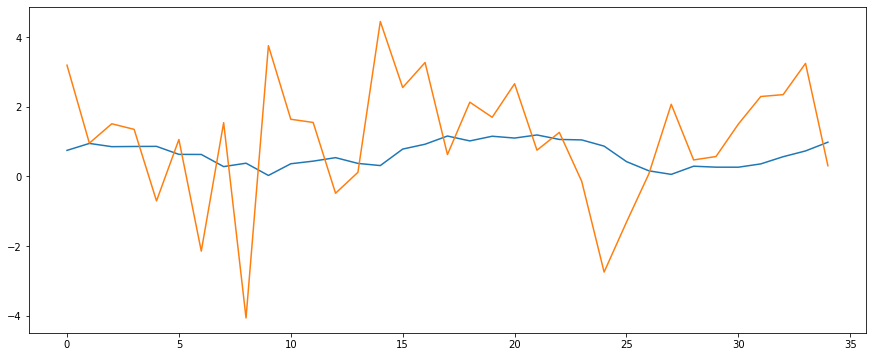

In [96]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [97]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

1/1 [==============================] - 0s 16ms/step


,Test Predictions,Actuals
0,0.893854,0.365
1,0.821475,2.666
2,0.995010,2.668
3,1.094644,4.063
4,1.326462,4.580
5,1.526189,3.322
6,1.563663,2.523
7,1.531519,1.937
8,1.461952,2.095
9,1.412202,2.081


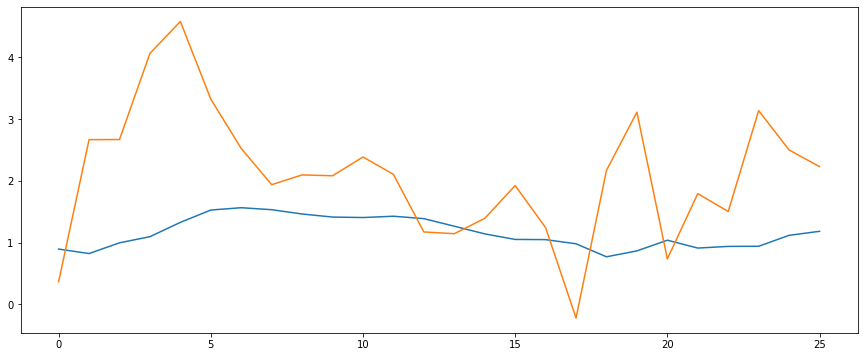

In [98]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [99]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

1/1 [==============================] - 0s 16ms/step


(    Predictions  Actuals
 0      0.893854    0.365
 1      0.821475    2.666
 2      0.995010    2.668
 3      1.094644    4.063
 4      1.326462    4.580
 5      1.526189    3.322
 6      1.563663    2.523
 7      1.531519    1.937
 8      1.461952    2.095
 9      1.412202    2.081
 10     1.404740    2.385
 11     1.425742    2.104
 12     1.386789    1.171
 13     1.264039    1.143
 14     1.139935    1.391
 15     1.050013    1.922
 16     1.046977    1.241
 17     0.979441   -0.222
 18     0.768987    2.169
 19     0.864339    3.111
 20     1.037450    0.735
 21     0.910253    1.792
 22     0.937105    1.502
 23     0.939220    3.136
 24     1.116505    2.499
 25     1.181579    2.229,
 1.9558342670103164)

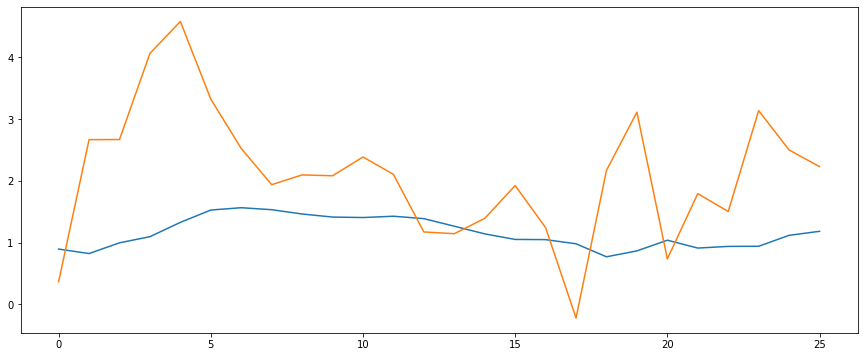

In [100]:
plot_predictions1(model1, X_test1, y_test1)